# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


The environment is already saved in the Workspace and can be accessed at the file path provided below. 

In [2]:
from unityagents import UnityEnvironment
import numpy as np

env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Note that **in this coding environment, you will not be able to watch the agents while they are training**, and you should set `train_mode=True` to restart the environment.

In [5]:
for i in range(5):                                         # play game for 5 episodes
    env_info = env.reset(train_mode=False)[brain_name]     # reset the environment    
    states = env_info.vector_observations                  # get the current state (for each agent)
    scores = np.zeros(num_agents)                          # initialize the score (for each agent)
    while True:
        actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
        actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
        env_info = env.step(actions)[brain_name]           # send all actions to tne environment
        next_states = env_info.vector_observations         # get next state (for each agent)
        rewards = env_info.rewards                         # get reward (for each agent)
        dones = env_info.local_done                        # see if episode finished
        scores += env_info.rewards                         # update the score (for each agent)
        states = next_states                               # roll over states to next time step
        if np.any(dones):                                  # exit loop if episode finished
            break
    print('Total score (averaged over agents) this episode: {}'.format(np.mean(scores)))

Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: -0.004999999888241291
Total score (averaged over agents) this episode: 0.04500000085681677


When finished, you can close the environment.

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine! 

**4.1 DDPG Algorithm**

According to https://towardsdatascience.com/deep-deterministic-policy-gradient-ddpg-theory-and-implementation-747a3010e82f:

Deep Deterministic Policy Gradient (DDPG) is a reinforcement learning technique that combines both Q-learning and Policy gradients. DDPG being an actor-critic technique consists of two models: Actor and Critic. The actor is a policy network that takes the state as input and outputs the exact action (continuous), instead of a probability distribution over actions. The critic is a Q-value network that takes in state and action as input and outputs the Q-value. DDPG is an “off”-policy method. DDPG is used in the continuous action setting and the “deterministic” in DDPG refers to the fact that the actor computes the action directly instead of a probability distribution over actions. DDPG is used in a continuous action setting and is an improvement over the vanilla actor-critic.

**4.2 Neural Networks architecture**

The Actor and Critic are sharing the same architecture, consist of two fully-connected layers with Batch normalization applied to second hidden layer. ReLu has been used as activation function for hidden layers and Tanh for output. The weights defined from uniform distribution.

**4.3 Hyperparameters**

Hyperparameters from learning exercises has been used as a starting point. Then hyperparameters were improved empirically.

- fc1_units=512 # Number of nodes in the first hidden layer
- fc2_units=512 # Number of nodes in the second hidden layer
- BUFFER_SIZE = int(1e6) # replay buffer size
- BATCH_SIZE = 256 # minibatch size
- GAMMA = 0.99 # discount factor
- TAU = 1e-3 # for soft update of target parameters
- LR_ACTOR = 1e-3 # learning rate of the actor
- LR_CRITIC = 1e-3 # learning rate of the critic
- WEIGHT_DECAY = 0 # L2 weight decay
- LEARN_EVERY = 1 # learning timestep interval
- LEARN_NUM = 10 # number of learning passes
- GRAD_CLIPPING = 1.0 # gradient clipping
- OU_SIGMA = 0.2 # OU noise parameter
- OU_THETA = 0.15 # OU noise parameter
- EPSILON = 1.0 # for epsilon in the noise process (act step)
- EPSILON_DECAY = 1e-6 3 epsilon decay rate
- num_episodes=10000 # maximum number of training episodes
- max_t=1000 # maximum number of timesteps per episode

In [6]:
import numpy as np
import torch 
import torch.nn as nn
import torch.nn.functional as F

def hidden_init(layer):
    fan_in = layer.weight.data.size()[0]
    lim = 1. / np.sqrt(fan_in)
    return(-lim, lim)

def linear(fc_in, fc_out, batch_norm = True):
    layers = []
    linear_layer = nn.Linear(fc_in, fc_out)
    layers.append(linear_layer)
    if batch_norm:
        layers.append(nn.BatchNorm1d(fc_out))
    return nn.Sequential(*layers)

class Actor(nn.Module):
    
    def __init__(self, state_size, action_size, seed, fc1_units=512, fc2_units=512):
        
        super(Actor, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = linear(state_size, fc1_units, batch_norm = False)
        self.fc2 = linear(fc1_units, fc2_units)
        self.fc3 =  linear(fc2_units, action_size, batch_norm = False)
        self.reset_parameters()
        
    def reset_parameters(self):
        self.fc1[0].weight.data.uniform_(*hidden_init(self.fc1[0]))
        self.fc2[0].weight.data.uniform_(*hidden_init(self.fc2[0]))
        self.fc3[0].weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state):
        x = F.relu(self.fc1(state))
        x = F.relu(self.fc2(x))
        return torch.tanh(self.fc3(x))
    
class Critic(nn.Module):
    def __init__(self, state_size, action_size, seed, fc1_units=512, fc2_units=512):
        super(Critic, self).__init__()
        self.seed = torch.manual_seed(seed)
        self.fc1 = linear(state_size, fc1_units, batch_norm = False)
        self.fc2 = linear(fc1_units+action_size, fc2_units)
        self.fc3 = linear(fc2_units, 1, batch_norm = False)
        self.reset_parameters()
        
    def reset_parameters(self):
        self.fc1[0].weight.data.uniform_(*hidden_init(self.fc1[0]))
        self.fc2[0].weight.data.uniform_(*hidden_init(self.fc2[0]))
        self.fc3[0].weight.data.uniform_(-3e-3, 3e-3)
        
    def forward(self, state, action):
        x = F.relu(self.fc1(state))
        x = torch.cat((x, action), dim=1)
        x = F.relu(self.fc2(x))
        return self.fc3(x)

In [7]:
import copy
import os
import random
from collections import namedtuple, deque

import numpy as np
import torch
import torch.nn.functional as F
import torch.optim as optim


BUFFER_SIZE = int(1e6) 
BATCH_SIZE = 256       
GAMMA = 0.99           
TAU = 2e-3             
LR_ACTOR = 1e-3        
LR_CRITIC = 1e-3       
WEIGHT_DECAY = 0       

LEARN_EVERY = 1       
LEARN_NUM = 10           
GRAD_CLIPPING = 1.0         

OU_SIGMA = 0.1
OU_THETA = 0.15

EPSILON = 1.0         
EPSILON_DECAY = 1e-6

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

class Agent():
    
    def __init__(self, state_size, action_size, random_seed=0):
        self.state_size = state_size
        self.action_size = action_size
        self.seed = random.seed(random_seed)
        
        self.epsilon = EPSILON
        
        self.actor_local = Actor(state_size, action_size, random_seed).to(device)
        self.actor_target = Actor(state_size, action_size, random_seed).to(device)
        self.actor_optimizer = optim.Adam(self.actor_local.parameters(), lr=LR_ACTOR)
        
        self.critic_local = Critic(state_size, action_size, random_seed).to(device)
        self.critic_target = Critic(state_size, action_size, random_seed).to(device)
        self.critic_optimizer = optim.Adam(self.critic_local.parameters(), lr=LR_CRITIC, weight_decay=WEIGHT_DECAY)
        
        self.noise = OUNoise(action_size, random_seed)
        
        self.memory = ReplayBuffer(action_size, BUFFER_SIZE, BATCH_SIZE, random_seed)
        
        
    def step(self, state, action, reward, next_state, done, timestep):
        self.memory.add(state, action, reward, next_state, done)
        
        if len(self.memory) > BATCH_SIZE and timestep % LEARN_EVERY == 0:
            for _ in range(LEARN_NUM):
                experiences = self.memory.sample()
                self.learn(experiences, GAMMA)
                
    def act(self, state, add_noise=True):
        state = torch.from_numpy(state).float().to(device)
        self.actor_local.eval()
        with torch.no_grad():
            action = self.actor_local(state).cpu().data.numpy()
        self.actor_local.train()
        
        if add_noise:
            action += self.epsilon * self.noise.sample()
            
        return np.clip(action, -1, 1)
    
    def reset(self):
        self.noise.reset()
        
    def learn(self, experiences, gamma):
        states, actions, rewards, next_states, dones = experiences
        
        actions_next = self.actor_target(next_states)
        Q_targets_next = self.critic_target(next_states, actions_next)
        Q_targets = rewards + (gamma * Q_targets_next * (1 - dones))
        Q_expected = self.critic_local(states, actions)
        critic_loss = F.mse_loss(Q_expected, Q_targets)
        self.critic_optimizer.zero_grad()
        critic_loss.backward()
        if GRAD_CLIPPING > 0:
            torch.nn.utils.clip_grad_norm_(self.critic_local.parameters(), GRAD_CLIPPING)
        self.critic_optimizer.step()
        
        actions_pred = self.actor_local(states)
        actor_loss = -self.critic_local(states, actions_pred).mean()
        self.actor_optimizer.zero_grad()
        actor_loss.backward()
        self.actor_optimizer.step()
        
        self.soft_update(self.critic_local, self.critic_target, TAU)
        self.soft_update(self.actor_local, self.actor_target, TAU)
        
        if EPSILON_DECAY > 0:
            self.epsilon -= EPSILON_DECAY
            self.noise.reset()
            
    def soft_update(self, local_model, target_model, tau):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
            target_param.data.copy_(tau*local_param.data + (1.0-tau)*target_param.data)
            
class OUNoise:
    
    def __init__(self, size, seed, mu=0., theta=OU_THETA, sigma=OU_SIGMA):
        self.mu = mu * np.ones(size)
        self.theta = theta
        self.sigma = sigma
        self.seed = random.seed(seed)
        self.reset()
        
    def reset(self):
        self.state = copy.copy(self.mu)
        
    def sample(self):
        x = self.state
        self.state = x + np.random.normal(self.mu, self.sigma)
        return self.state
    
class ReplayBuffer:
       
    def __init__(self, action_size, buffer_size, batch_size, seed):
        self.action_size = action_size
        self.memory = deque(maxlen=buffer_size) 
        self.batch_size = batch_size
        self.experience = namedtuple("Experience", field_names = ["state", "action", "reward", "next_state", "done"])
        self.seed = random.seed(seed)
        
    def add(self, state, action, reward, next_state, done):
        e = self.experience(state, action, reward, next_state, done)
        self.memory.append(e)
        
    def sample(self):
        experiences =  random.sample(self.memory, k=self.batch_size)
        states = torch.from_numpy(np.vstack([e.state for e in experiences if e is not None])).float().to(device)
        actions = torch.from_numpy(np.vstack([e.action for e in experiences if e is not None])).float().to(device)
        rewards = torch.from_numpy(np.vstack([e.reward for e in experiences if e is not None])).float().to(device)
        next_states = torch.from_numpy(np.vstack([e.next_state for e in experiences if e is not None])).float().to(device)
        dones = torch.from_numpy(np.vstack([e.done for e in experiences if e is not None]).astype(np.uint8)).float().to(device)
        
        return (states, actions, rewards, next_states, dones)
    
    def __len__(self):
        return len(self.memory)

In [8]:
def ddpg(num_episodes=10000, max_t=1000, print_every=1):
    
    max_scores = [] 
    running_avgs = []
    best_score = -np.inf
    scores_mean = deque(maxlen=100) 
    
    for i_episode in range(1, num_episodes + 1):
        env_info = env.reset(train_mode=True)[brain_name] 
        states = env_info.vector_observations 
        scores = np.zeros(num_agents) 
        agent.reset()
        for t in range(max_t):
            actions = agent.act(states, add_noise=True) 
            env_info = env.step(actions)[brain_name]  
            next_states = env_info.vector_observations 
            rewards = env_info.rewards 
            dones = env_info.local_done 
            for state, action, reward, next_state, done in zip(states, actions, rewards, next_states, dones):
                agent.step(state, action, reward, next_state, done, t)
            states = next_states
            scores += rewards
            if np.any(dones):
                break
        max_scores.append(np.max(scores)) 
        scores_mean.append(max_scores[-1]) 
        running_avgs.append(np.mean(scores_mean)) 
        
        if i_episode % print_every == 0:
            print("\rEpisode {} \tMax score: {:.5f}\tMoving Avg: {:.5f}"\
                  .format(i_episode, max_scores[-1], running_avgs[-1]))
        if running_avgs[-1] >= 0.5:
            print("\nEnvironment solved in {:d} episodes.\tAverage score: {:.3f}"\
                 .format(i_episode, running_avgs[-1]))
            torch.save(agent.actor_local.state_dict(), 'actor.pth')
            torch.save(agent.critic_local.state_dict(), 'critic.pth')
            break
            
    return max_scores, running_avgs

In [9]:
seed = 3
agent = Agent(state_size=state_size, action_size=action_size, random_seed=seed)

In [10]:
scores, avgs = ddpg()

Episode 1 	Max score: 0.00000	Moving Avg: 0.00000
Episode 2 	Max score: 0.00000	Moving Avg: 0.00000
Episode 3 	Max score: 0.00000	Moving Avg: 0.00000
Episode 4 	Max score: 0.00000	Moving Avg: 0.00000
Episode 5 	Max score: 0.00000	Moving Avg: 0.00000
Episode 6 	Max score: 0.00000	Moving Avg: 0.00000
Episode 7 	Max score: 0.00000	Moving Avg: 0.00000
Episode 8 	Max score: 0.00000	Moving Avg: 0.00000
Episode 9 	Max score: 0.00000	Moving Avg: 0.00000
Episode 10 	Max score: 0.09000	Moving Avg: 0.00900
Episode 11 	Max score: 0.00000	Moving Avg: 0.00818
Episode 12 	Max score: 0.00000	Moving Avg: 0.00750
Episode 13 	Max score: 0.10000	Moving Avg: 0.01462
Episode 14 	Max score: 0.00000	Moving Avg: 0.01357
Episode 15 	Max score: 0.00000	Moving Avg: 0.01267
Episode 16 	Max score: 0.00000	Moving Avg: 0.01188
Episode 17 	Max score: 0.00000	Moving Avg: 0.01118
Episode 18 	Max score: 0.00000	Moving Avg: 0.01056
Episode 19 	Max score: 0.00000	Moving Avg: 0.01000
Episode 20 	Max score: 0.00000	Moving Av

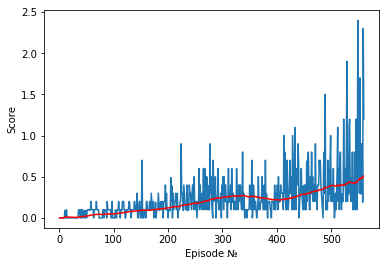

In [11]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

fig = plt.figure()
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label='DDPG')
plt.plot(np.arange(len(scores)), avgs, c='r', label='Running AVG')
plt.ylabel('Score')
plt.xlabel('Episode №')
plt.show()

In [ ]:
env.close()

**Future ideas**
- Algorithm is very sensitive to hyperparameters. Furter tuning could lead to different results.
- Different weight initialization and different activation functions affect model performance. Leaky_Relu and Normal distribution prooved to be useless. Could try other(xaviernormal, xavieruniform, kaiminguniform,kaimingnormal).
- Algorithms other than DDPG could be used for solving the environment. Also could try to change Actor-Critic architecture, making a single Neural Net, which share input layers and first hidden layer and splitting after.
- Prioritized Experience Replay could be implemented to further enhance the performance of the agent.